# Практичееское задание: "Проект для курса "Python для Data Science""

## Описание задания

#### Задание:
Построить предиктивную модель для предсказания цен на недвижимость.
С помощью полученной модели, предсказать цены для квартир из тестового датасета (test.csv).

#### Цель проекта:
1) Осуществить отработку полученных навыков
2) Понять логику построения кода относительно проектотв связа 
нных с обучением 
3) Осуществить отработку чтения и подготовки набора данных для обучения
4) Полученный результат загрузить на Kaggle, провести дополнительные изыскания как можно улучшить результат
#### Метрика качества:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

#### Требования к решению:

### Описание датасета:
- *Id* - идентификационный номер квартиры
- *DistrictId* - идентификационный номер района
- *Rooms* - количество комнат
- *Square* - общая площадь
- *LifeSquare* - жилая площадь
- *KitchenSquare* - площадь кухни
- *Floor* - этаж
- *HouseFloor* - количество этажей
- *HouseYear* - год постройки
- *Ecology_1, Ecology_2, Ecology_3* - экологические показатели 
- *Social_1, Social_2, Social_3* - социальные показатели 
- *Healthcare_1, Helthcare_2* - показатели местности, связанные с здравоохранением (поликлиники, больницы и т.д)
- *Shops_1, Shops_2* - показатель инфрмаструктуры (магазины)
- *Price* - цена квартиры




### Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

matplotlib.rcParams.update({'font.size': 14})

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

import pickle

In [ ]:
DATASET_PATH = 'C:/Users/nikit/Downloads/real-estate-price-prediction-moscow/train.csv'
TEST_DATASET_PATH = 'C:/Users/nikit/Downloads/real-estate-price-prediction-moscow/test.csv'
PREPARED_DATASET_PATH = 'housing_train_prepared.csv'



### Загрузка данных

In [ ]:
df_train = pd.read_csv(DATASET_PATH)
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [ ]:
df_train.shape

(10000, 20)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

 2 признака имеют большое количество отсутствующих значений.

### количественные признаки

In [ ]:
df_num_features = df_train.select_dtypes(include=['float', 'int'])
df_num_features.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,11,3097,0,NaN,0,0,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,30,6207,1,1183.0,1,0,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,33,5261,0,240.0,3,1,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,1,264,0,NaN,0,1,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,33,8667,2,NaN,0,6,343995.102962


In [ ]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### категориальные признаки

In [ ]:
df_obj_features = df_train.select_dtypes(include='object')
df_obj_features.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


In [ ]:
df_train['Ecology_2'].value_counts(0)

B    9903
A      97
Name: Ecology_2, dtype: int64

In [ ]:
df_train['Ecology_3'].value_counts(0)

B    9725
A     275
Name: Ecology_3, dtype: int64

In [ ]:
df_train['Shops_2'].value_counts(0)

B    9175
A     825
Name: Shops_2, dtype: int64

### обработка пропусков

In [ ]:
df_train.isna().sum(axis=0)

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Пропуски в LifeSquare (жилая площадь) и Square (общая площадь), необходимо найти соотношение между средней жилой площадью и средней общей площадью. Затем заполним пропущенные значения значением Square, умноженным на найденный коэффициент.



In [ ]:
median_lsq_sq_coeff = df_train['LifeSquare'].median() / df_train['Square'].median()
median_lsq_sq_coeff

0.6242466955442353

In [ ]:
df_train.loc[df_train['LifeSquare'].isnull(), 'LifeSquare'] = df_train['Square'] * median_lsq_sq_coeff

Healthcare_1	имеет смысл заменить пропущенные значения на медианное значение признака

In [ ]:
df_train.loc[df_train['Healthcare_1'].isnull(), 'Healthcare_1'] = df_train['Healthcare_1'].median()

In [ ]:
df_train.isna().sum(axis=0)

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

### Замена значений категориальных признаков

Ecology_2, Ecology_3 и Shops_2, имеет смысл заменить буквы на бинарный признак A = 1 и B = 0

In [ ]:
df_train.replace({'Ecology_2': {'A': 1, 'B': 0}}, inplace=True)

In [ ]:
df_train.replace({'Ecology_3': {'A': 1, 'B': 0}}, inplace=True)

In [ ]:
df_train.replace({'Shops_2': {'A': 1, 'B': 0}}, inplace=True)

In [ ]:
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,71.805419,10.0,4,10.0,2014,0.075424,0,0,11,3097,0,900.0,0,0,0,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,0,0,30,6207,1,1183.0,1,0,0,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,0,0,33,5261,0,240.0,3,1,0,282078.720850
3,2352,1,1.0,40.409907,25.225751,1.0,10,22.0,1977,0.007122,0,0,1,264,0,900.0,0,1,0,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,0,0,33,8667,2,900.0,0,6,0,343995.102962


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  int64  
 11  Ecology_3      10000 non-null  int64  
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   10000 non-null  float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Мы видим, что теперь все признаки у нас цифровые, а также нет пропусков.

### Анализ и обработка выбросов

#### Rooms

Посмотрим количество каждого из значений признака Rooms

In [ ]:
df_train['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

 строки с "подозрительными" значениями

In [ ]:
df_train[((df_train['Rooms'] >= 5) & (df_train['Square'] <= 50)) | (df_train['Rooms'] == 0) | (df_train['Rooms'] >= 6)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2004,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,0,0,74,19083,2,900.0,5,15,0,317265.323792
2194,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,0,0,43,8429,3,900.0,3,9,0,158998.110646
2728,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,0,0,25,5648,1,30.0,2,4,0,172329.270863
2799,6358,27,5.0,42.003293,26.220417,0.0,5,12.0,1977,0.011654,0,0,4,915,0,900.0,0,0,0,112693.641769
3780,7317,27,0.0,41.790881,26.087820,0.0,13,0.0,1977,0.211401,0,0,9,1892,0,900.0,0,1,0,98129.976788
5894,770,28,0.0,49.483501,30.889912,0.0,16,0.0,2015,0.118537,0,0,30,6207,1,1183.0,1,0,0,217009.338463
6088,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,0,0,1,264,0,900.0,0,1,0,78364.616704
6401,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,0,0,9,1892,0,900.0,0,1,0,219281.918007
7644,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,0,0,9,1892,0,900.0,0,1,0,302211.260887
7929,456,6,0.0,81.491446,50.870766,0.0,4,0.0,1977,0.243205,0,0,5,1564,0,540.0,0,0,0,212864.799112


Учитывая, что строк с аномальным количеством комнат немного , имеет смысл удалить эти строки.

In [ ]:
df_train = df_train.drop(df_train[((df_train['Rooms'] >= 5) & (df_train['Square'] <= 50)) | (df_train['Rooms'] == 0)| (df_train['Rooms'] >= 6)].index, axis = 'rows').reset_index(drop=True)

#### LifeSquare

Выведем строки со значением LifeSquare больше 1.96 стандартных отклонения

In [ ]:
df_train[(df_train['LifeSquare'] < df_train['LifeSquare'].mean() - df_train['LifeSquare'].std() * 1.96) | (df_train['LifeSquare'] > df_train['LifeSquare'].mean() + df_train['LifeSquare'].std() * 1.96)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
357,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,0,0,6,1437,3,900.0,0,2,0,141780.231857
726,28,9,2.0,604.705972,377.485705,1.0,17,18.0,1977,0.161532,0,0,25,5648,1,30.0,2,4,0,187717.242538
1776,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,0,0,53,14892,4,900.0,1,4,0,528560.506016
1906,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,0,1,31,7010,5,4508.0,3,7,0,455264.882666
5178,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,0,0,52,11217,1,2300.0,1,7,0,394253.299978
7002,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,0,0,26,3889,6,705.0,3,6,0,90470.430830
7989,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,0,0,2,469,0,900.0,0,0,0,217357.492366
9217,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,0,0,22,6398,141,1046.0,3,23,0,133529.681562


Эти строки эти имеют аномальные значения признаков Square и LifeSquare, поэтому их тоже имеет смысл удалить из обучающей выборки

In [ ]:
df_train = df_train.drop(df_train[
    (df_train['LifeSquare'] < df_train['LifeSquare'].mean() - df_train['LifeSquare'].std() * 1.96) |
    (df_train['LifeSquare'] > df_train['LifeSquare'].mean() + df_train['LifeSquare'].std() * 1.96)].index, axis = 'rows').reset_index(drop=True)

#### KitchenSquare

Выведем строки со значением KitchenSquare 1.96 стандартных отклонения от среднего значения

In [ ]:
df_train[(df_train['KitchenSquare'] < df_train['KitchenSquare'].mean() - df_train['KitchenSquare'].std() * 1.96) |
   (df_train['KitchenSquare'] > df_train['KitchenSquare'].mean() + df_train['KitchenSquare'].std() * 1.96)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
286,2737,27,3.0,123.430072,125.806981,123.0,5,10.0,2015,0.017647,0,0,2,469,0,900.0,0,0,0,234194.837047
1726,16395,2,3.0,79.722243,44.731219,72.0,12,16.0,1987,0.130618,0,0,39,10418,9,900.0,1,9,0,370148.625285
2448,12390,72,3.0,97.490674,99.323558,96.0,22,25.0,2019,0.210473,0,0,11,2398,2,1994.0,3,0,0,445074.956552
2778,6569,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,0,0,4,915,0,900.0,0,0,0,99079.960518
2823,12507,54,2.0,79.810535,79.578961,78.0,10,15.0,2014,0.006076,0,0,30,5285,0,645.0,6,6,0,438708.707579
3232,2371,27,2.0,68.841073,64.234956,66.0,4,2.0,2014,0.017647,0,0,2,469,0,900.0,0,0,0,189244.249909
3947,4966,96,3.0,78.445675,47.146757,75.0,9,12.0,1977,0.041116,0,0,53,14892,4,900.0,1,4,0,290354.484070
4993,7441,62,3.0,114.734473,112.589083,112.0,3,3.0,2015,0.072158,0,0,2,629,1,900.0,0,0,1,315245.521059
5263,13703,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,0,0,21,5731,0,900.0,1,0,0,160488.033165
5782,6508,23,2.0,67.146049,33.959154,63.0,5,17.0,2019,0.034656,0,0,0,168,0,900.0,0,0,0,193130.585871


Эти строки также являются аномальными, т.к. KitchenSquare равна или сильно превышает общую площадь Square. Удалим их.

In [ ]:
df_train = df_train.drop(df_train[(df_train['KitchenSquare'] < df_train['KitchenSquare'].mean() - df_train['KitchenSquare'].std() * 1.96) |
   (df_train['KitchenSquare'] > df_train['KitchenSquare'].mean() + df_train['KitchenSquare'].std() * 1.96)].index, axis = 'rows').reset_index(drop=True)

#### HouseYear

Выведем дома, у которых год постройки > 2021

In [ ]:
df_train[df_train['HouseYear'] > 2021]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8797,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,0,0,25,4756,16,2857.0,5,8,0,243028.603096
9132,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,0,0,30,6141,10,262.0,3,6,0,254084.534396


Заменим значения '20052011' на 2008  и 4068 на 1968

In [ ]:
df_train.replace({'HouseYear': {20052011: 2008, 4968: 1968}}, inplace=True)

#### Square

Выведем квартиры с общей площадью меньше 10, а также где общая площадь меньше жилой и разница более 10м2

In [ ]:
df_train[(df_train['Square'] < 10) | (df_train['Square'] + 10 < df_train['LifeSquare'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
161,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,0,0,23,5212,6,900.0,3,2,0,438005.182323
327,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,0,0,9,1892,0,900.0,0,1,0,161379.067034
1398,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,0,0,16,3433,4,2643.0,4,5,0,369472.403061
4480,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,0,0,53,13670,4,900.0,1,11,0,458378.777006
4784,7657,38,1.0,4.502784,4.618547,1.0,28,1.0,1977,0.060753,0,0,15,2787,2,520.0,0,7,0,483283.488083
4992,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,0,0,4,915,0,900.0,0,0,0,107604.269441
5693,8961,27,1.0,33.398983,164.153360,6.0,3,5.0,1965,0.211401,0,0,9,1892,0,900.0,0,1,0,104891.073757
7008,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,0,0,43,8429,3,900.0,3,9,0,412511.088764
7445,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,0,0,1,264,0,900.0,0,1,0,181434.825589
8542,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,0,0,5,1564,0,540.0,0,0,0,137597.601458


Эти данные тоже стоит признать аномальными и удалить

In [ ]:
df_train = df_train.drop(df_train[(df_train['Square'] < 10) | (df_train['Square'] + 10 < df_train['LifeSquare'])].index, axis = 'rows').reset_index(drop=True)

In [ ]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,9953.000000,9953.000000,9953.000000,9953.000000,9953.000000,9953.000000,9953.000000,9953.000000,9953.000000,9953.000000,9953.000000,9953.000000,9953.000000,9953.000000,9953.000000,9953.000000,9953.000000,9953.000000,9953.000000,9953.000000
mean,8379.963127,50.452828,1.887170,56.144381,36.266465,5.792023,8.524967,12.622325,1984.814729,0.118914,0.009746,0.027529,24.708530,5355.741284,8.056264,1026.486989,1.320004,4.234703,0.082689,214014.281257
std,4858.619216,43.639231,0.809428,18.786098,16.340312,4.368426,5.231921,6.761819,18.395011,0.119126,0.098244,0.163628,17.521804,4003.687596,23.846248,746.970218,1.492673,4.807004,0.275425,92670.552178
min,0.000000,0.000000,1.000000,13.784865,0.370619,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4166.000000,20.000000,1.000000,41.784525,24.358538,1.000000,4.000000,9.000000,1974.000000,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,0.000000,153912.044504
50%,8393.000000,36.000000,2.000000,52.513850,33.275668,6.000000,7.000000,13.000000,1977.000000,0.075424,0.000000,0.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,0.000000,192198.448321
75%,12590.000000,75.000000,2.000000,65.875102,44.877071,9.000000,12.000000,17.000000,2001.000000,0.195781,0.000000,0.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,0.000000,249063.801948
max,16798.000000,209.000000,5.000000,198.930182,174.837082,62.000000,42.000000,117.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


### Графический анализ данных

#### Анализ целевой переменной

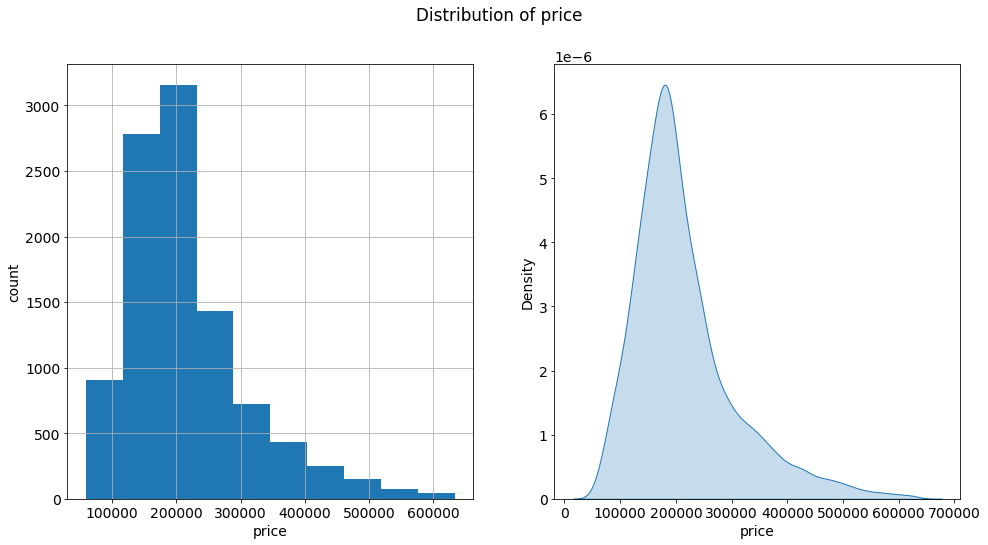

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
df_train['Price'].hist()
plt.xlabel('price')
plt.ylabel('count')

plt.subplot(122)
sns.kdeplot(df_train['Price'], shade=True, legend=False)
plt.xlabel('price')

plt.suptitle('Distribution of price')
plt.show()

Распределение без заметных выбросов.  


In [ ]:
target_mean = round(df_train['Price'].mean(), 2)
target_median = df_train['Price'].median()

target_mean, target_median

(214014.28, 192198.44832082995)

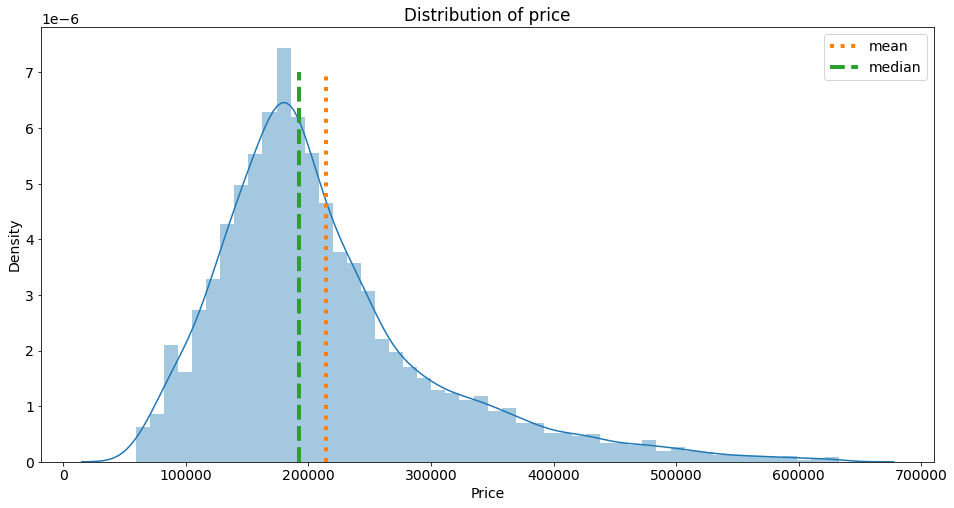

In [ ]:
plt.figure(figsize=(16, 8))

sns.distplot(df_train['Price'])

y = np.linspace(0, 7e-6, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.title('Distribution of price')
plt.legend()
plt.show()

### Анализ взаимосвязи признаков

Обновим перечень цифровых признаков и построим матрицу корреляции в виде тепловой карты

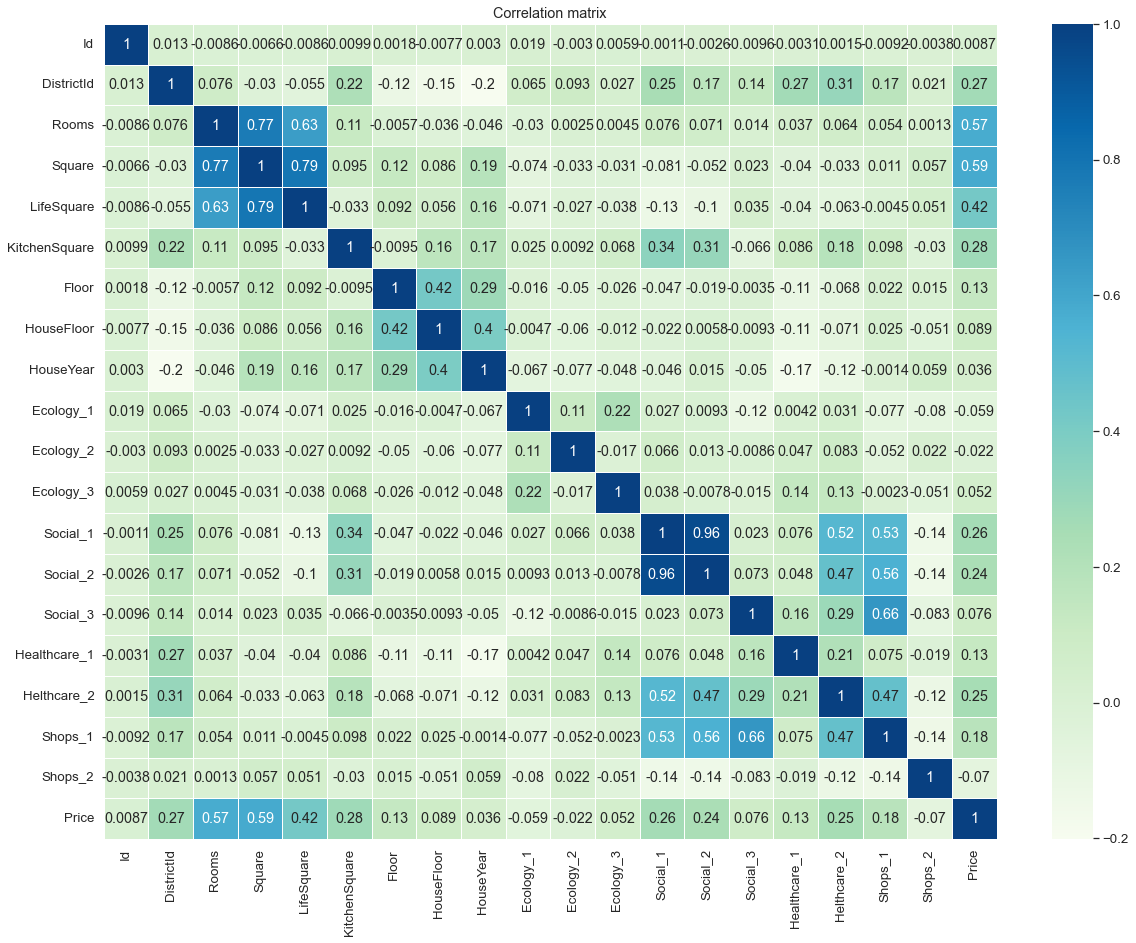

In [ ]:
plt.figure(figsize=(20, 15))

sns.set(font_scale=1.2)
sns.heatmap(df_train.corr(), annot=True, linewidths=0.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

### Отбор лишних признаков

Удалим признак Id как незначимый, а также LifeSquare, т.к. он сильно коррелирует с Square и по сути является избыточным.

In [ ]:
df_train = df_train.drop(['Id', 'LifeSquare'], axis = 'columns')

DistrictId, заменим значения этого признака на медианную цену кв.м по району.

In [ ]:
df_train['Price_sq_meter'] = df_train['Price'] / df_train['Square']

In [ ]:
median_price_by_id = df_train.groupby('DistrictId')[['Price_sq_meter']].median().reset_index()

In [ ]:
df_train = pd.merge(df_train, median_price_by_id, how='left', on='DistrictId')

In [ ]:
df_train.head()

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Price_sq_meter_x,Price_sq_meter_y
0,27,3.0,115.027311,10.0,4,10.0,2014,0.075424,0,0,11,3097,0,900.0,0,0,0,305018.871089,2651.708272,2762.513283
1,22,1.0,39.832524,8.0,7,8.0,1966,0.118537,0,0,30,6207,1,1183.0,1,0,0,177734.553407,4462.045990,3553.678687
2,1,3.0,78.342215,10.0,2,17.0,1988,0.025609,0,0,33,5261,0,240.0,3,1,0,282078.720850,3600.596698,3251.274406
3,1,1.0,40.409907,1.0,10,22.0,1977,0.007122,0,0,1,264,0,900.0,0,1,0,168106.007630,4160.019670,3251.274406
4,94,2.0,64.285067,9.0,16,16.0,1972,0.282798,0,0,33,8667,2,900.0,0,6,0,343995.102962,5351.088794,4219.992382


In [ ]:
df_train = df_train.drop(['DistrictId', 'Price_sq_meter_x'], axis='columns')

### Сохраняем подготовленный датасет

In [ ]:
df_train.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

In [ ]:
df_train = pd.read_csv(PREPARED_DATASET_PATH)

### Отбор признаков

In [ ]:
df_train.columns.tolist()

['Rooms',
 'Square',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Price_sq_meter_y']

In [ ]:
feature_names = ['Rooms',
 'Square',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price_sq_meter_y']
target_name = ['Price']

### Разбиение выборки

In [ ]:
X = df_train[feature_names]
y = df_train[target_name]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

### Построение модели ML

#### Скрипт для отображения оценки качества модели

In [ ]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" +
          str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

#### RandomForrestRegressor

In [ ]:
parameters = {
    'n_estimators': [150, 200, 250, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(10, 15, 25),
}

gs = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=parameters,
    scoring='r2',
    cv=5,
)

In [ ]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([10]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [150, 200, 250, 500]},
             scoring='r2')

In [ ]:
gs.best_params_

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 500}

In [ ]:
rf_model = RandomForestRegressor(max_depth=14, max_features='log2', n_estimators=150)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, max_features='log2', n_estimators=150)

R2:	0.934
MAE:	15219.054
MSE:	561336490.26


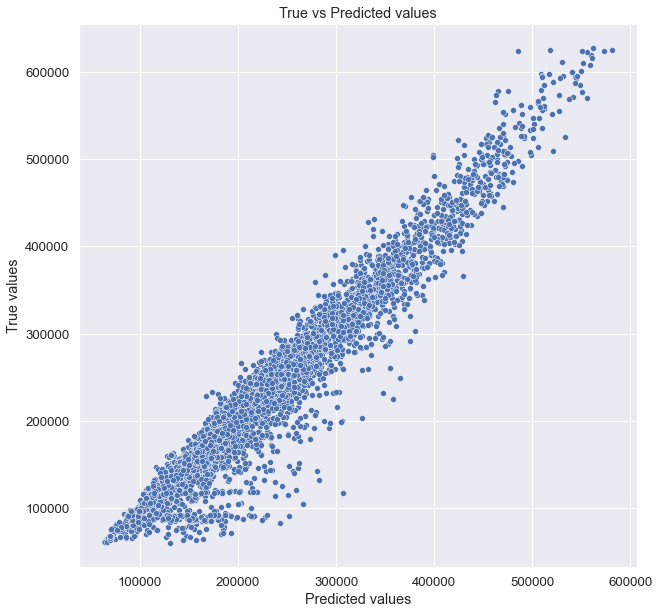

In [ ]:
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train.values.flatten(), y_train_preds.flatten())

R2:	0.768
MAE:	26193.853
MSE:	2020738233.675


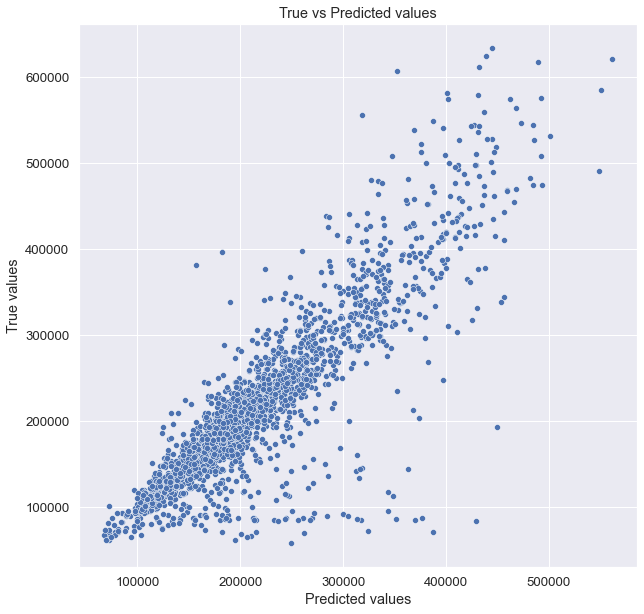

In [ ]:
y_valid_preds = rf_model.predict(X_valid)
evaluate_preds(y_valid.values.flatten(), y_valid_preds.flatten())

важность признаков.

In [ ]:
f_importance = pd.DataFrame()
f_importance['Name'] = feature_names
f_importance['Values'] = rf_model.feature_importances_
f_importance.sort_values('Values', ascending=False).reset_index(drop=True)

,Name,Values
0,Square,0.297518
1,Price_sq_meter_y,0.172162
2,Rooms,0.136343
3,Social_2,0.059062
4,Social_1,0.055659
5,KitchenSquare,0.048877
6,HouseYear,0.042932
7,Social_3,0.038840
8,HouseFloor,0.031194
9,Floor,0.028444


Исключим признаки со значимостью ниже 0.02, проведем повторное обучение.

In [ ]:
feature_names = ['Rooms',
 'Square',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Shops_1',
 'Price_sq_meter_y']
target_name = ['Price']

In [ ]:
X = df_train[feature_names]
y = df_train[target_name]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(max_depth=14, max_features='log2', n_estimators=150)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, max_features='log2', n_estimators=150)

R2:	0.936
MAE:	15004.958
MSE:	542699910.979


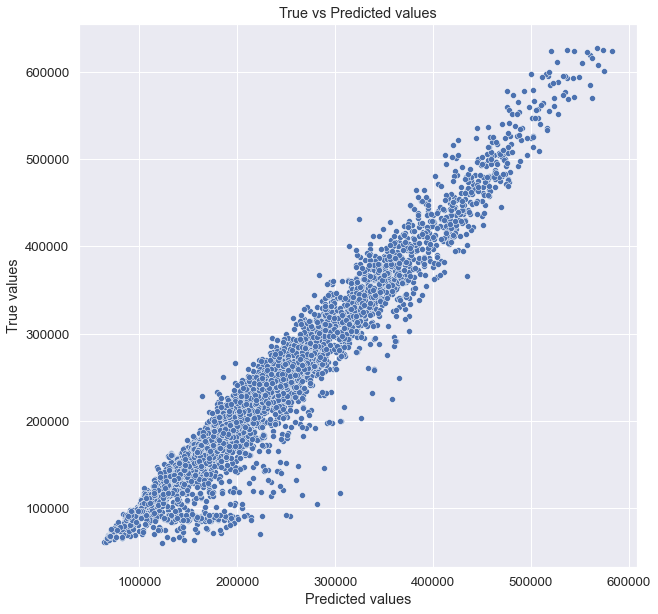

In [ ]:
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train.values.flatten(), y_train_preds.flatten())

R2:	0.767
MAE:	26115.339
MSE:	2030908820.31


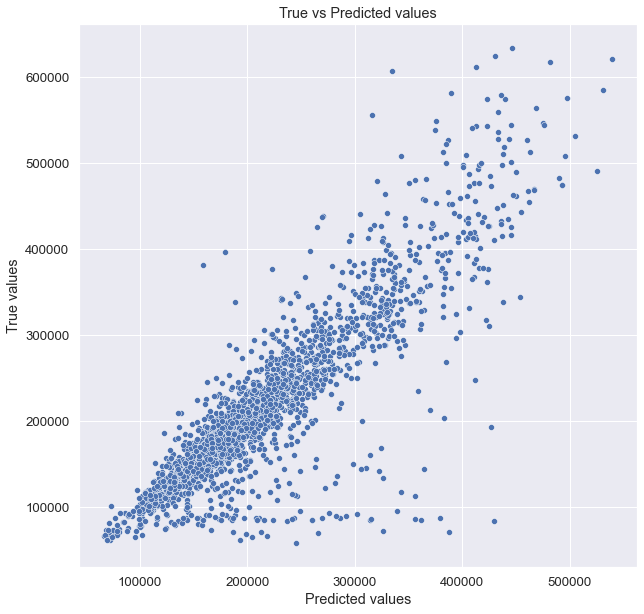

In [ ]:
y_valid_preds = rf_model.predict(X_valid)
evaluate_preds(y_valid.values.flatten(), y_valid_preds.flatten())

Переобучим на полном наборе данных.

In [ ]:
final_model = rf_model.fit(X, y)

### Сохранение модели

In [ ]:
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(final_model, file)

In [ ]:
with open(MODEL_FILE_PATH, 'rb') as file:
    model_load=pickle.load(file)

### Проверка работы модели на тестовых данных

Загрузим тестовый набор.

In [ ]:
df_test = pd.read_csv(TEST_DATASET_PATH)

In [ ]:
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

обработка датасета 

In [ ]:
# уберем пропуски
median_lsq_sq_coeff = df_test['LifeSquare'].median() / df_test['Square'].median()
df_test.loc[df_test['LifeSquare'].isnull(), 'LifeSquare'] = df_test['Square'] * median_lsq_sq_coeff
df_test.loc[df_test['Healthcare_1'].isnull(), 'Healthcare_1'] = df_test['Healthcare_1'].median()

In [ ]:
# заменяем категориальные признаки на бинарные
df_test.replace({'Ecology_2': {'A': 1, 'B': 0}}, inplace=True)
df_test.replace({'Ecology_3': {'A': 1, 'B': 0}}, inplace=True)
df_test.replace({'Shops_2': {'A': 1, 'B': 0}}, inplace=True)

In [ ]:
# заменяем DistrictId на среднюю цену по району
df_test = pd.merge(df_test, median_price_by_id, how='left', on='DistrictId')
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price_sq_meter
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,0,0,24,4378,0,1036.0,1,1,0,4610.399155
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,0,0,2,629,1,900.0,0,0,1,2613.223638
2,960,27,2.0,59.463678,36.995412,9.0,19,19.0,1977,0.211401,0,0,9,1892,0,900.0,0,1,0,2762.513283
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,0,0,2,475,0,900.0,0,0,0,2272.439183
4,746,74,1.0,53.837056,33.494801,1.0,8,17.0,1977,0.309479,0,0,35,7715,4,990.0,0,6,0,3319.318045


In [ ]:
df_test = df_test.drop('DistrictId', axis='columns')
df_test['Price_sq_meter'] = df_test['Price_sq_meter'].fillna(df_test['Price_sq_meter'].median())

In [ ]:
df_test.isnull().sum()

Id                0
Rooms             0
Square            0
LifeSquare        0
KitchenSquare     0
Floor             0
HouseFloor        0
HouseYear         0
Ecology_1         0
Ecology_2         0
Ecology_3         0
Social_1          0
Social_2          0
Social_3          0
Healthcare_1      0
Helthcare_2       0
Shops_1           0
Shops_2           0
Price_sq_meter    0
dtype: int64

In [ ]:
y_test_preds = model_load.predict(df_test.drop(['Id', 'LifeSquare', 'Ecology_2','Ecology_3', 'Healthcare_1', 'Helthcare_2', 'Shops_2'], axis = 'columns'))

In [ ]:
y_test_preds = pd.DataFrame(y_test_preds, columns=['Price'])

In [ ]:
y_test_preds.insert(0, 'Id', df_test['Id'])

In [ ]:
y_test_preds.to_csv('kaggle_predictions3.csv', index=False, encoding='utf-8')

### Выводы

Анализ датасета показал отсутствие значений ряда признаков, а также некорректные значения признаков у ряда объектов. Отсутствующие значения были расчитаны и дополнены на базе статистических показателей. Строки, некорректные значения которых не удалось интерпретиовать, были удалены , чтобы не вносить шумы в модель.

Методы линейной регрессии показали результат предсказания, удовлетворяющий условию успешности проекта (R2 > 0,6), но были менее эффективны чем модели на основе RandomForesRegressor.

Лучшего разультата удалось добиться после удаления признака LifeSquare, который сильно коррелировал с общей площадью, а также ряда слабозначимых признаков. Был создан производный признак на основе DistrictId, который был использован для группировки значений цены по району. Новый производный признак - средняя стоимость кв.м. площади по району.

Результат при загрузке на Kaggle: 0.75575



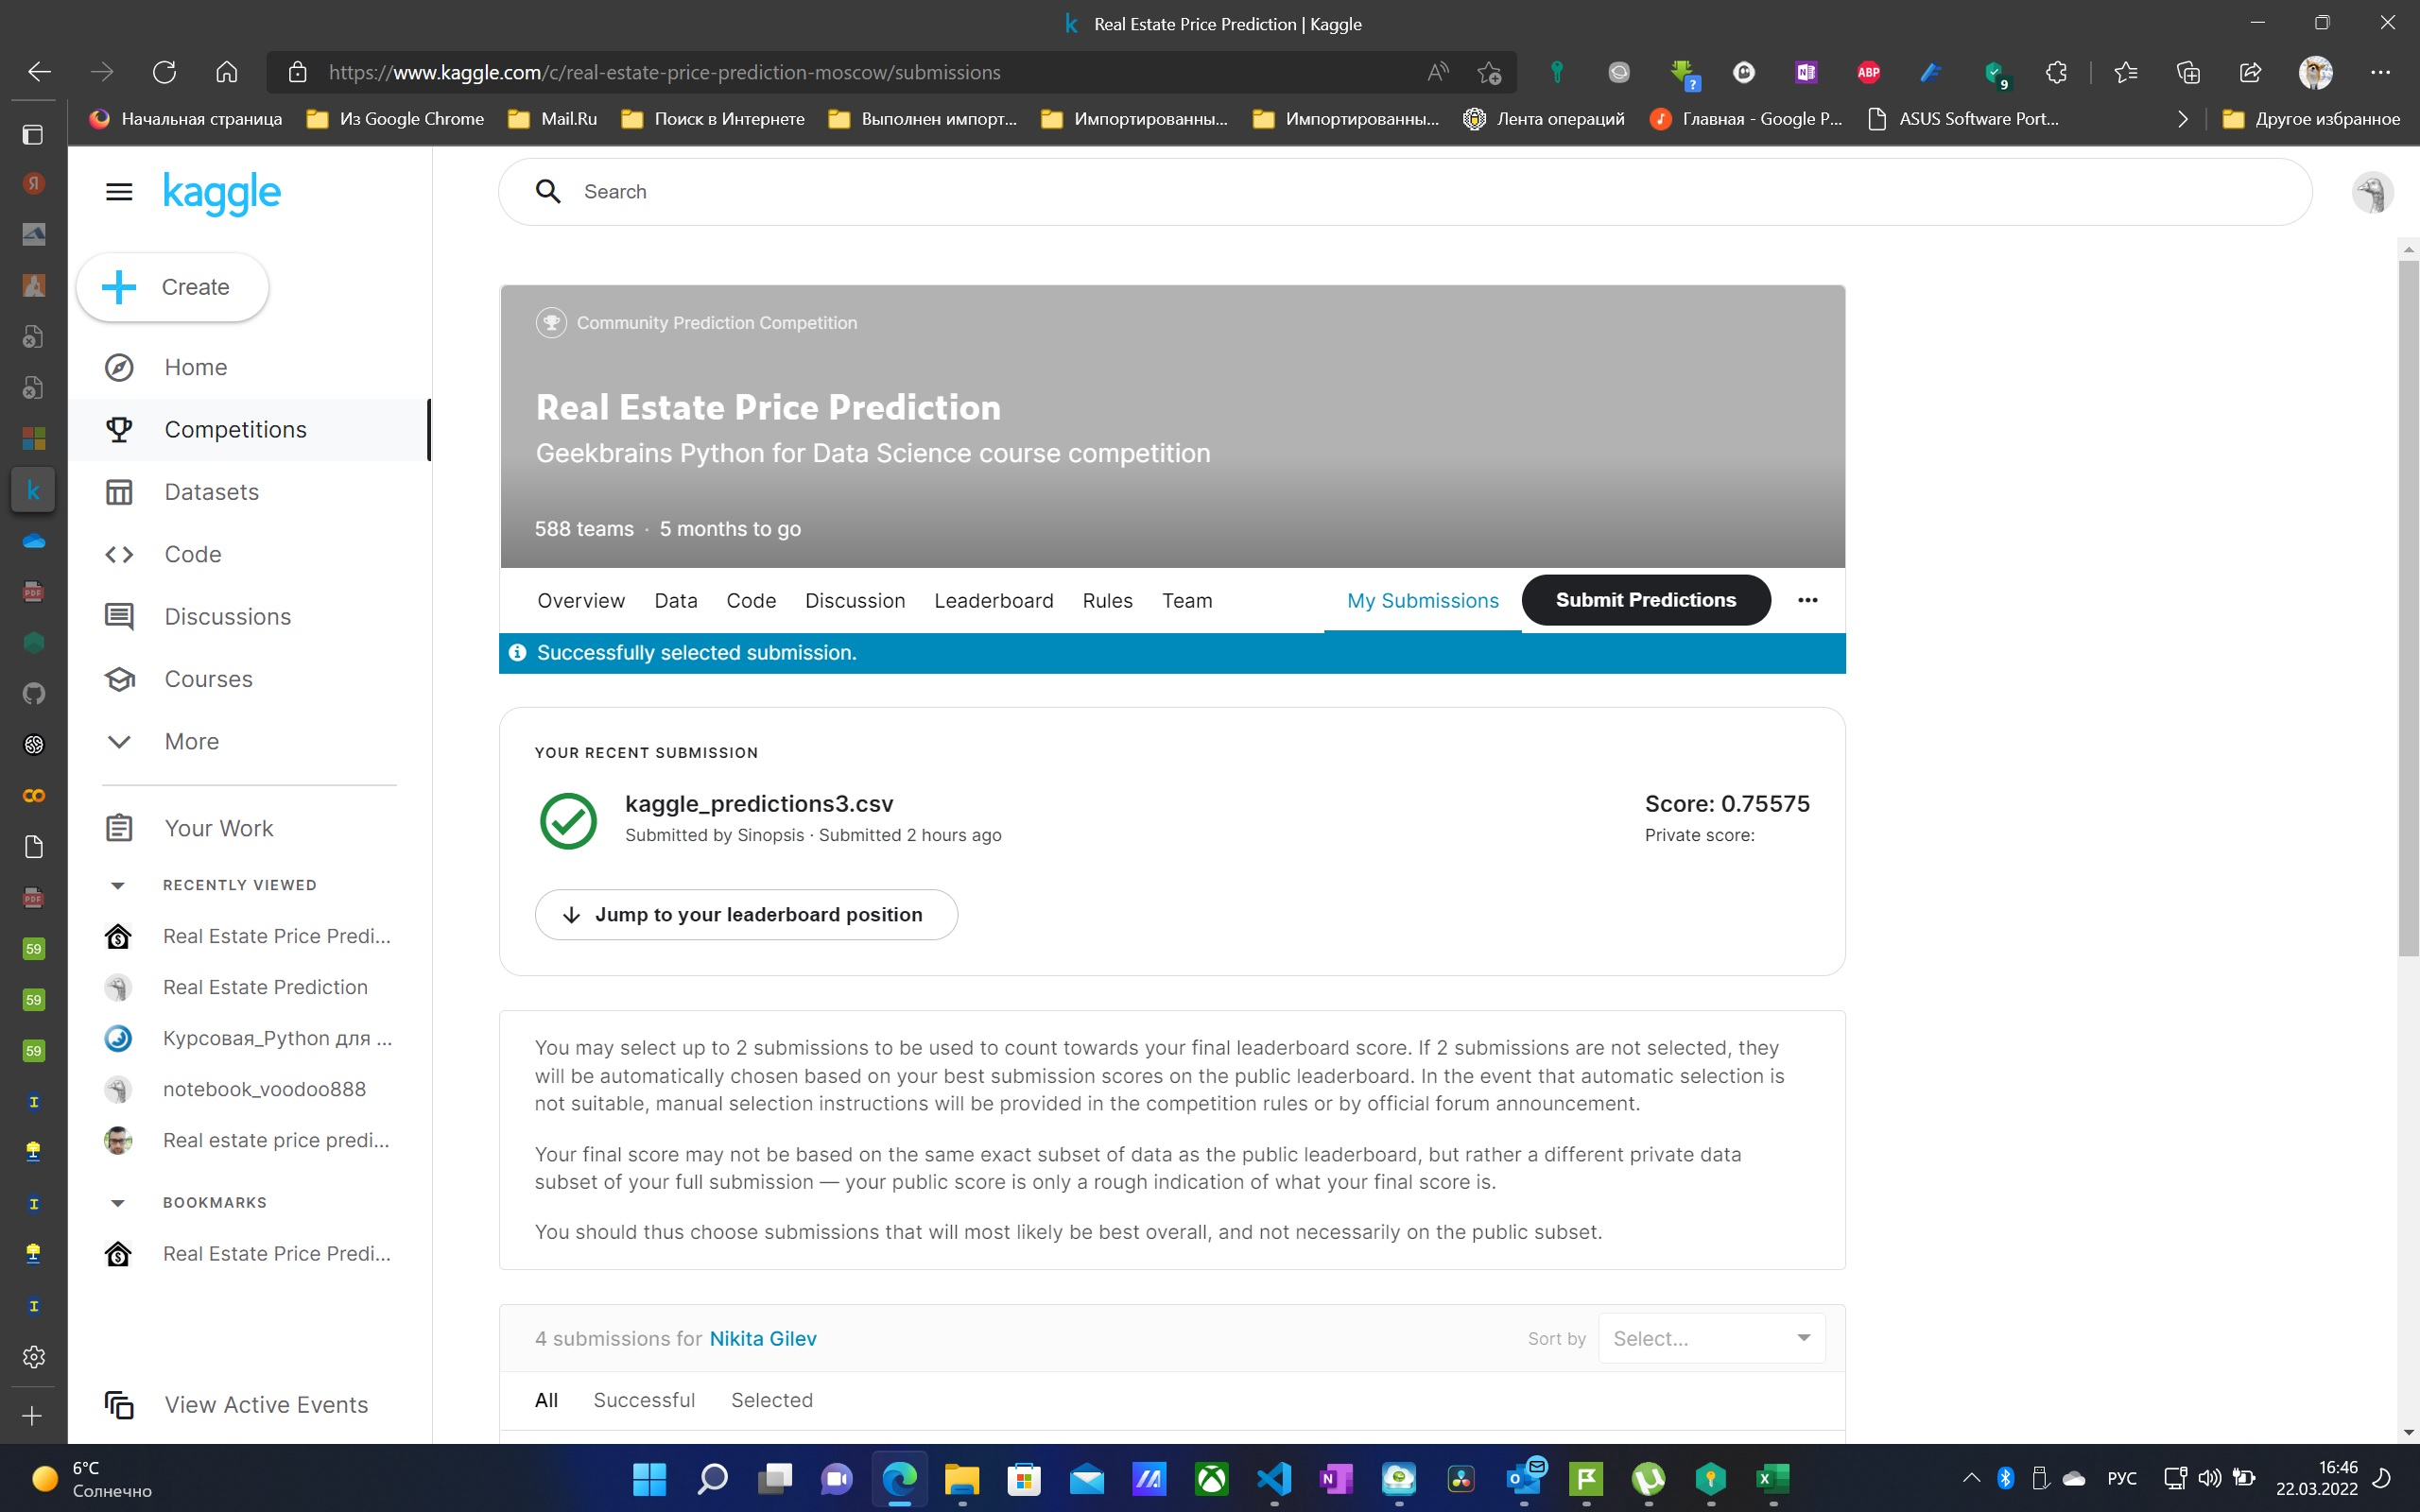

In [ ]:
from IPython.core.display import Image, display
display(Image("C:/Users/nikit/OneDrive/Изображения/Kaggle.png", width = 800, height = 700))